In [1]:
import os, shutil

In [2]:
base_dir = 'data/clothes'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)
    
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

In [3]:
train_onepiece_dir = os.path.join(train_dir, 'onepiece')
#os.mkdir(train_onepiece_dir)

train_shortSleeve_dir = os.path.join(train_dir, 'shortSleeve')
#os.mkdir(train_shortSleeve_dir)

In [4]:
test_onepiece_dir = os.path.join(test_dir, 'onepiece')
#os.mkdir(test_onepiece_dir)

test_shortSleeve_dir = os.path.join(test_dir, 'shortSleeve')
#os.mkdir(test_shortSleeve_dir)

In [5]:
print('훈련용 원피스 이미지 전체 개수:', 
      len(os.listdir(train_onepiece_dir)))
print('훈련용 반팔티 이미지 전체 개수:', 
      len(os.listdir(train_shortSleeve_dir)))
print('테스트용 원피스 이미지 전체 개수:', 
      len(os.listdir(test_onepiece_dir)))
print('테스트용 반팔티 이미지 전체 개수:', 
      len(os.listdir(test_shortSleeve_dir)))

훈련용 원피스 이미지 전체 개수: 924
훈련용 반팔티 이미지 전체 개수: 1500
테스트용 원피스 이미지 전체 개수: 230
테스트용 반팔티 이미지 전체 개수: 382


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
model = Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape=(150, 150, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150, 150), # 이미지 크기 지정(모든 데이터가 크기 동일하게)
                                                   batch_size=20,
                                                   class_mode='binary')    # 두 폴더중 첫번째를 0(원피스), 두번째를 1(반팔)

validation_generator = test_datagen.flow_from_directory(test_dir,
                                                   target_size=(150, 150),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 2423 images belonging to 2 classes.
Found 612 images belonging to 2 classes.


In [10]:
history = model.fit(train_generator, epochs=30, validation_data = validation_generator,
                   callbacks=[early_stopping])

Epoch 1/30
122/122 [==============================] - 42s 332ms/step - loss: 0.5982 - accuracy: 0.6711 - val_loss: 0.5072 - val_accuracy: 0.7451
Epoch 2/30
122/122 [==============================] - 27s 222ms/step - loss: 0.4851 - accuracy: 0.7656 - val_loss: 0.4951 - val_accuracy: 0.7500
Epoch 3/30
122/122 [==============================] - 28s 228ms/step - loss: 0.4291 - accuracy: 0.7994 - val_loss: 0.4611 - val_accuracy: 0.7778
Epoch 4/30
122/122 [==============================] - 27s 220ms/step - loss: 0.3751 - accuracy: 0.8246 - val_loss: 0.4425 - val_accuracy: 0.7925
Epoch 5/30
122/122 [==============================] - 29s 236ms/step - loss: 0.3105 - accuracy: 0.8638 - val_loss: 0.3664 - val_accuracy: 0.8333
Epoch 6/30
122/122 [==============================] - 27s 220ms/step - loss: 0.2719 - accuracy: 0.8828 - val_loss: 0.3261 - val_accuracy: 0.8562
Epoch 7/30
122/122 [==============================] - 27s 221ms/step - loss: 0.2190 - accuracy: 0.9133 - val_loss: 0.2991 - val_ac

In [11]:
import matplotlib.pyplot as plt

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

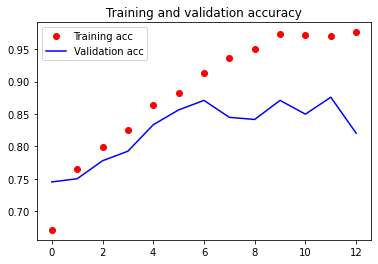

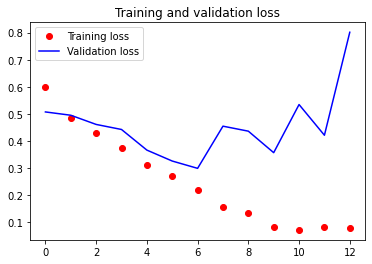

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
self_dir = os.path.join('data', 'tmp_0930')
self_rescale = ImageDataGenerator(rescale = 1./255)
self_test = self_rescale.flow_from_directory(self_dir,target_size=(150,150),class_mode='binary')
Y_prediction = model.predict(self_test)
Y_prediction

Found 6 images belonging to 1 classes.
1/1 [==============================] - 0s 82ms/step


array([[6.9587213e-01],
       [1.1266076e-04],
       [9.6812618e-01],
       [4.5520377e-01],
       [3.8987705e-01],
       [6.0370755e-01]], dtype=float32)

In [1]:
self_dir = os.path.join('data', 'tmp_0930')
self_rescale = ImageDataGenerator(rescale = 1./255)
self_test = self_rescale.flow_from_directory(self_dir,target_size=(150,150),class_mode='categorical')
Y_prediction = model.predict(self_test)
Y_prediction

NameError: name 'os' is not defined